In [ ]:
import tweepy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
df=pd.read_csv('/content/Ola.csv')

In [ ]:
df

,Unnamed: 0,User,Tweet,Time,Favorite Count,Retweet Count,Source,Location,Userverified
0,0,itsashu1707,@ola_supports This is what I got from the supp...,2023-05-12 14:29:48+00:00,0,0,Twitter for Android,NaN,False
1,1,Master_Narayan,@ola_supports ola is refusing to refund the ca...,2023-05-12 14:29:17+00:00,0,0,Twitter for Android,NaN,False
2,2,aro_vishal,@ola_supports Pls find CRN details..\n\nContac...,2023-05-12 14:26:00+00:00,0,0,Twitter for Android,NaN,False
3,3,RakeshP42979436,@ola_supports Please I request you to give pro...,2023-05-12 14:24:10+00:00,1,0,Twitter for Android,NaN,False
4,4,RakeshP42979436,@ola_supports After giving complain on mail I ...,2023-05-12 14:22:02+00:00,0,0,Twitter for Android,NaN,False
...,...,...,...,...,...,...,...,...,...
5731,5731,ShuklaShelender,RT @ShuklaShelender: @ola_supports @Olacabs Un...,2023-05-02 18:03:31+00:00,0,1,Twitter for Android,भारत,False
5732,5732,WadhawanSakshi,@ola_supports 10 days no update \nYou are fool...,2023-05-02 18:00:30+00:00,0,0,Twitter for Android,NaN,False
5733,5733,SA75774971,@ola_supports @Olacabs I booked ola &amp; paid...,2023-05-02 17:57:37+00:00,0,0,Twitter for Android,NaN,False
5734,5734,WriteToAshishJi,Hey @ola_supports @Olacabs\n\nMy father is ent...,2023-05-02 17:56:02+00:00,0,0,Twitter for Android,India,False


In [ ]:
df1=df.sample(n=3000)

In [ ]:
df1

In [ ]:
df2=df[:3000]

In [ ]:
df2

In [ ]:
#data cleaning
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+:","",tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub('<[^>]+>', '', tweet)
    tweet = re.sub(r'\bRT\b','',tweet)
    tweet = re.sub(r'\brt\b','',tweet)
    tweet = re.sub(r':','',tweet)
    tweet = re.sub(r'\n','',tweet)
    tweet = re.sub(r'https','',tweet)
    tweet = re.sub(r'#','',tweet)

    return tweet
df['Tweet'] = df['Tweet'].map(lambda x: cleaner(x))

In [ ]:
df=df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df

,Unnamed: 0,User,Tweet,Time,Favorite Count,Retweet Count,Source,Location,Userverified
0,0,itsashu1707,This is what I got from the support team afte...,2023-05-12 14:29:48+00:00,0,0,Twitter for Android,nan,False
1,1,Master_Narayan,ola is refusing to refund the cancellation am...,2023-05-12 14:29:17+00:00,0,0,Twitter for Android,nan,False
2,2,aro_vishal,Pls find CRN details..Contact details 8411958...,2023-05-12 14:26:00+00:00,0,0,Twitter for Android,nan,False
3,3,RakeshP42979436,Please I request you to give proper justifiab...,2023-05-12 14:24:10+00:00,1,0,Twitter for Android,nan,False
4,4,RakeshP42979436,After giving complain on mail I got the reply...,2023-05-12 14:22:02+00:00,0,0,Twitter for Android,nan,False
...,...,...,...,...,...,...,...,...,...
5731,5731,ShuklaShelender,"Unable to pay online, I paid in cash but t...",2023-05-02 18:03:31+00:00,0,1,Twitter for Android,,False
5732,5732,WadhawanSakshi,10 days no update You are fooling me.,2023-05-02 18:00:30+00:00,0,0,Twitter for Android,nan,False
5733,5733,SA75774971,"I booked ola &amp; paid it via UPI, not sure...",2023-05-02 17:57:37+00:00,0,0,Twitter for Android,nan,False
5734,5734,WriteToAshishJi,Hey My father is entering the mobile number f...,2023-05-02 17:56:02+00:00,0,0,Twitter for Android,India,False


In [ ]:
#Remove Punctuations
def remove_punctuation(texts):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    for ele in texts:
        if ele in punc:
            texts = str(texts).replace(ele, "")
    return texts

df["Tweet"]=df["Tweet"].map(lambda x: remove_punctuation(x))

In [ ]:
df['Tweet']= df['Tweet'].apply(lambda x:x.lower())

In [ ]:
#Remove Stopwords using nltk
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')

df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tweetList=df.Tweet.tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokens=[]
nltk.download("punkt")
for i in tweetList:
    tokens.append(word_tokenize(i))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.isnull().sum()

Unnamed: 0        0
User              0
Tweet             0
Time              0
Favorite Count    0
Retweet Count     0
Source            0
Location          0
Userverified      0
dtype: int64

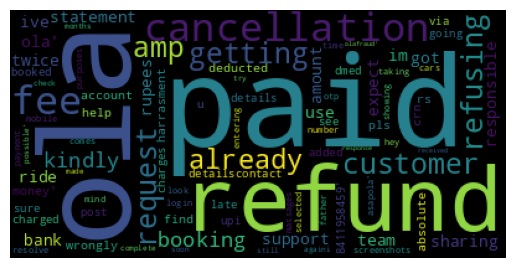

In [ ]:
#understanding the data
import matplotlib.pyplot as plt
text1=df["Tweet"].values
wordcloud = WordCloud().generate(str(text1))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
a=df['User'].unique()
print("unique users are",len(a))

unique users are 3360


In [ ]:
#sentiment analysis
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [ ]:
tweet_data= df.loc[:,'Tweet']

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [ ]:
for tweet in tweet_data:
    tweet=str(tweet)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, len(tweet_list))
negative = percentage(negative, len(tweet_list))
neutral = percentage(neutral, len(tweet_list))
polarity = percentage(polarity, len(tweet_list))

positive = round(positive,2)
negative = round(negative,2)
neutral = round(neutral,2)

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5736
positive number:  1867
negative number:  2300
neutral number:  1569


In [ ]:
negative_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,ola refusing refund cancellation amount wrongl...
1,giving complain mail got reply suggested route...
2,driver cancelled booking prior actual ride don...
3,last bill 44 estimate first time many times ha...
4,stop pay twice ride cant pay employees activit...
...,...
2295,frauds scammers
2296,really bad experience buying ola received call...
2297,3 months hell guys refunding money ticket id o...
2298,unable pay online paid cash ride still showing...


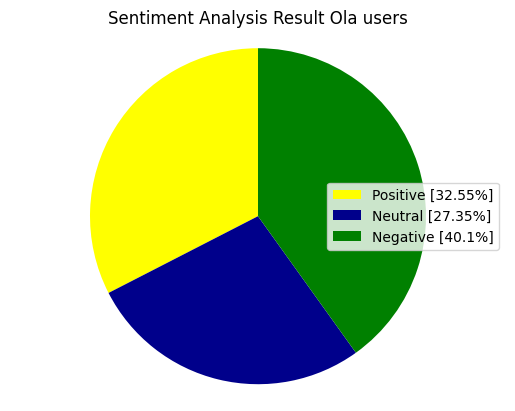

In [ ]:
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellow", "darkblue","green"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result Ola users")
plt.axis("equal")
plt.show()

In [ ]:
#lda topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
id2word = corpora.Dictionary(tokens)

# Create Corpus
texts = tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('247', 1),
  ('bank', 1),
  ('cancellation', 1),
  ('customer', 1),
  ('expect', 1),
  ('fee', 1),
  ('getting', 1),
  ('got', 1),
  ('im', 1),
  ('ive', 1),
  ('ola', 1),
  ('paid', 2),
  ('responsible', 1),
  ('ride', 1),
  ('rupees', 1),
  ('sharing', 1),
  ('statement', 1),
  ('support', 1),
  ('team', 1),
  ('twice', 1),
  ('use', 1)]]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics(10,15))

[(0,
  '0.107*"home" + 0.040*"using" + 0.040*"see" + 0.037*"times" + 0.034*"stop" + '
  '0.024*"saying" + 0.022*"come" + 0.022*"bike" + 0.022*"scam" + 0.021*"asap" '
  '+ 0.020*"reached" + 0.020*"sending" + 0.018*"return" + 0.017*"trying" + '
  '0.017*"left"'),
 (1,
  '0.075*"email" + 0.068*"received" + 0.053*"id" + 0.051*"till" + 0.036*"make" '
  '+ 0.033*"sure" + 0.022*"change" + 0.020*"looking" + 0.020*"message" + '
  '0.018*"registered" + 0.017*"location" + 0.017*"better" + 0.014*"revert" + '
  '0.013*"touch" + 0.013*"side"'),
 (2,
  '0.140*"us" + 0.139*"understand" + 0.043*"tried" + 0.038*"distance" + '
  '0.038*"km" + 0.037*"guy" + 0.036*"patna" + 0.036*"284" + 0.020*"charges" + '
  '0.016*"working" + 0.015*"without" + 0.011*"services" + 0.011*"online" + '
  '0.010*"hai" + 0.010*"making"'),
 (3,
  '0.039*"provide" + 0.035*"worst" + 0.034*"im" + 0.028*"able" + 0.025*"case" '
  '+ 0.024*"concern" + 0.023*"shows" + 0.023*"use" + 0.021*"dues" + '
  '0.019*"cant" + 0.018*"twice" + 0.0

In [ ]:
doc_lda = lda_model[corpus]

In [ ]:
doc_lda

In [ ]:
#Perplexity and Coherence Score
from gensim.models import CoherenceModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.9215584125461795

Coherence Score:  0.41734289023563925


In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.107*"home" + 0.040*"using" + 0.040*"see" + 0.037*"times" + 0.034*"stop" + '
  '0.024*"saying" + 0.022*"come" + 0.022*"bike" + 0.022*"scam" + 0.021*"asap"'),
 (1,
  '0.075*"email" + 0.068*"received" + 0.053*"id" + 0.051*"till" + 0.036*"make" '
  '+ 0.033*"sure" + 0.022*"change" + 0.020*"looking" + 0.020*"message" + '
  '0.018*"registered"'),
 (2,
  '0.140*"us" + 0.139*"understand" + 0.043*"tried" + 0.038*"distance" + '
  '0.038*"km" + 0.037*"guy" + 0.036*"patna" + 0.036*"284" + 0.020*"charges" + '
  '0.016*"working"'),
 (3,
  '0.039*"provide" + 0.035*"worst" + 0.034*"im" + 0.028*"able" + 0.025*"case" '
  '+ 0.024*"concern" + 0.023*"shows" + 0.023*"use" + 0.021*"dues" + '
  '0.019*"cant"'),
 (4,
  '0.094*"service" + 0.062*"even" + 0.044*"since" + 0.032*"trip" + '
  '0.032*"drivers" + 0.029*"pathetic" + 0.019*"ago" + 0.015*"kind" + '
  '0.015*"havent" + 0.015*"documents"'),
 (5,
  '0.085*"support" + 0.076*"call" + 0.075*"dont" + 0.064*"go" + 0.061*"ever" + '
  '0.059*"topics" + 

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=id2word, mds='mmds')
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.435584 -0.214571       1        1  23.093476
7     -0.068205  0.455244       2        1  21.102116
6     -0.360819  0.241553       3        1  14.526996
2      0.287816 -0.342858       4        1  12.452012
9      0.343888 -0.056672       5        1   5.842343
4      0.343510  0.197718       6        1   5.482774
0      0.112547  0.220784       7        1   5.160895
3     -0.049325 -0.368761       8        1   4.644965
8     -0.177316  0.004129       9        1   4.491636
1      0.003489 -0.136565      10        1   3.202788, topic_info=            Term         Freq        Total Category  logprob  loglift
10           ola  1811.000000  1811.000000  Default  30.0000  30.0000
1334     numbers  1107.000000  1107.000000  Default  29.0000  29.0000
673           us  1286.000000  1286.000000  Default  28.0000  28.0000
502   understand  1278.000000  1278.000000  Default  27.0000  27.0000
17       support  1448.000000  1448.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
383       coming    13.719722    14.660380  Topic10  -5.1484   3.3748
6929     asapola    15.455989    16.524977  Topic10  -5.0293   3.3743
6825         del    14.233430    15.242873  Topic10  -5.1117   3.3726
1881       right    13.198701    14.139431  Topic10  -5.1871   3.3723
317           id   125.702662   168.532509  Topic10  -2.9333   3.1479

[336 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
305       1  0.993496     15
513       8  0.972311     20
944       9  0.975939   26th
2352      4  0.996890    284
1235      5  0.988433      5
...     ...       ...    ...
706       8  0.990762  worst
65        4  0.984382  would
821       4  0.984590  wrong
453       1  0.993528    yet
926       5  0.949786     yo

[311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 7, 3, 10, 5, 1, 4, 9, 2])

In [ ]:
#how to choose no of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokens, start=2,limit=40,step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


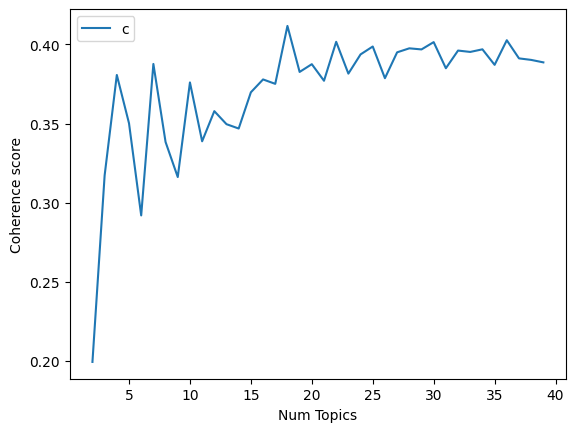

In [ ]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show() #Print the coherence scores

In [ ]:
column_names = ['tweet']
negative_list.columns = column_names
neutral_list.columns = column_names
positive_list.columns = column_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
neg=negative_list['tweet'].tolist()
neu=neutral_list['tweet'].tolist()
pos=positive_list['tweet'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


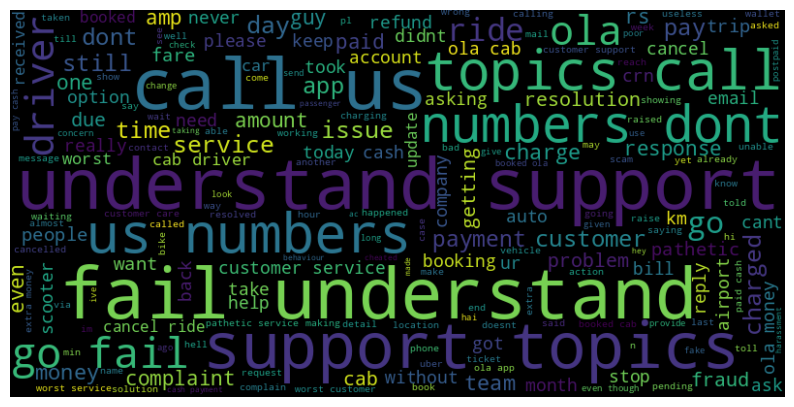

In [ ]:

#neutral_list = pd.DataFrame(neutral_list)
#negative_list = pd.DataFrame(negative_list)
#positive_list = pd.DataFrame(positive_list)

# Convert the list of negative words into a string
negative_text = ' '.join(neg)

# Create a WordCloud object with the negative text
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


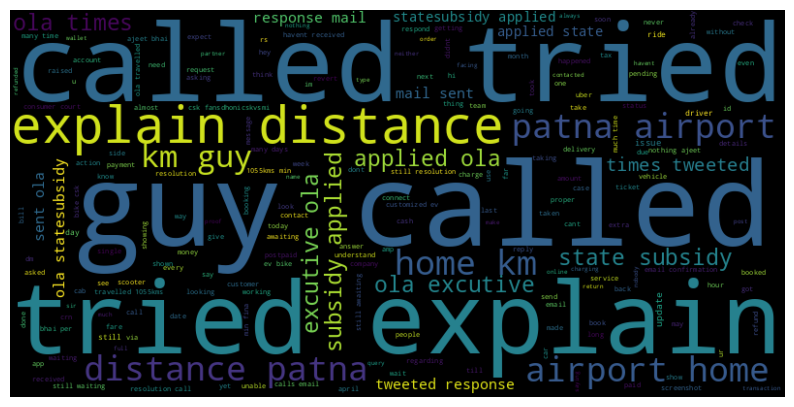

In [ ]:
# Convert the list of negative words into a string
neutral_text = ' '.join(neu)

# Create a WordCloud object with the negative text
wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


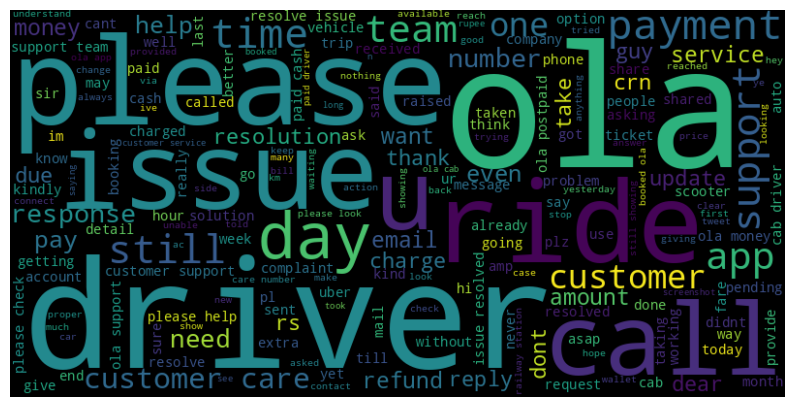

In [ ]:
# Convert the list of negative words into a string
positive_text = ' '.join(pos)

# Create a WordCloud object with the negative text
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Get the topic-term distribution from the LDA model
topics = lda_model.show_topics(num_topics=10, num_words=10)  # Assuming 10 topics and 5 terms per topic

# Create a table of topics and terms
topic_terms = pd.DataFrame(columns=['Topic', 'Terms'])

for topic_id, topic in topics:
    words = re.findall(r'"([^"]+)"', topic)
    topic_terms = topic_terms.append({'Topic': topic_id, 'Terms': words}, ignore_index=True)

# Display the table
print(topic_terms)

  Topic                                              Terms
0     0  [home, using, see, times, stop, saying, come, ...
1     1  [email, received, id, till, make, sure, change...
2     2  [us, understand, tried, distance, km, guy, pat...
3     3  [provide, worst, im, able, case, concern, show...
4     4  [service, even, since, trip, drivers, pathetic...
5     5  [support, call, dont, go, ever, topics, fail, ...
6     6  [ola, customer, payment, app, pay, cash, cab, ...
7     7  [driver, money, please, ride, issue, time, ref...
8     8  [called, scooter, reply, date, months, ur, sha...
9     9  [numbers, airport, want, know, much, emails, p...


<ipython-input-23-2fb471826d93>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_terms = topic_terms.append({'Topic': topic_id, 'Terms': words}, ignore_index=True)
<ipython-input-23-2fb471826d93>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_terms = topic_terms.append({'Topic': topic_id, 'Terms': words}, ignore_index=True)
<ipython-input-23-2fb471826d93>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_terms = topic_terms.append({'Topic': topic_id, 'Terms': words}, ignore_index=True)
<ipython-input-23-2fb471826d93>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_terms = topic_terms.append({'Topic': topic_id, 

In [ ]:
topic_terms

,Topic,Terms
0,0,"[home, using, see, times, stop, saying, come, ..."
1,1,"[email, received, id, till, make, sure, change..."
2,2,"[us, understand, tried, distance, km, guy, pat..."
3,3,"[provide, worst, im, able, case, concern, show..."
4,4,"[service, even, since, trip, drivers, pathetic..."
5,5,"[support, call, dont, go, ever, topics, fail, ..."
6,6,"[ola, customer, payment, app, pay, cash, cab, ..."
7,7,"[driver, money, please, ride, issue, time, ref..."
8,8,"[called, scooter, reply, date, months, ur, sha..."
9,9,"[numbers, airport, want, know, much, emails, p..."
